### Creating clusters for the songs we scraped from spotify

In [316]:
# import libraries
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from random import randint

In [317]:

musicdata = pd.read_csv('spotifydata.csv') # read data into dataframe
musicdata.drop(['Unnamed: 0'], axis = 1, inplace = True)  # drop weird new axis
original = musicdata  # make a copy
original

,artist,title,tid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,waka flocka flame,no hands (feat. roscoe dash & wale),03tqyYWC9Um2ZqU0ZN849H,0.760,0.595,1,-6.366,1,0.0391,0.005440,0.000000,0.2410,0.361,131.497
1,trick daddy,take it to da house,1wLhwzPAtze5JT8qqXlqaO,0.935,0.780,6,-5.795,0,0.1970,0.015800,0.000000,0.1640,0.918,123.895
2,dmx,ruff ryders' anthem,1BKT2I9x4RGKaKqW4up34s,0.880,0.577,10,-8.093,0,0.3020,0.056400,0.000001,0.2010,0.740,90.991
3,ugk,int'l players anthem (i choose you) (feat. out...,4ns1XFP3W5JPyzvnAjMdHD,0.675,0.680,4,-5.010,0,0.2560,0.065500,0.000000,0.3540,0.845,155.698
4,lil jon & the east side boyz,what u gon' do,1bTphHXspys3RvvRxfzzIc,0.838,0.724,1,-6.900,0,0.2420,0.000077,0.000001,0.1620,0.537,150.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,wilco,love is everywhere (beware),7sxr5Pvovng4ECTiCqeSWm,0.313,0.520,7,-9.436,1,0.0298,0.120000,0.452000,0.0993,0.511,144.249
9839,orville peck,dead of night,4WDazmiEd5PyY3taS11VfD,0.454,0.548,2,-11.618,1,0.0547,0.820000,0.356000,0.0606,0.500,99.892
9840,michaela anne,desert dove,7oC1Lo7hqhpxIU8d5iH6cc,0.592,0.419,2,-9.441,1,0.0296,0.349000,0.001020,0.0896,0.370,119.868
9841,joan shelley,coming down for you,4bDALATwj7AYLJ9h8cImWf,0.528,0.338,5,-10.942,0,0.0302,0.969000,0.077900,0.1600,0.555,92.262


In [318]:
# first i drop the unnecessary columns for the model

In [319]:
musicdata = musicdata.drop(['artist', 'title', 'tid'], axis = 1)
musicdata

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.760,0.595,1,-6.366,1,0.0391,0.005440,0.000000,0.2410,0.361,131.497
1,0.935,0.780,6,-5.795,0,0.1970,0.015800,0.000000,0.1640,0.918,123.895
2,0.880,0.577,10,-8.093,0,0.3020,0.056400,0.000001,0.2010,0.740,90.991
3,0.675,0.680,4,-5.010,0,0.2560,0.065500,0.000000,0.3540,0.845,155.698
4,0.838,0.724,1,-6.900,0,0.2420,0.000077,0.000001,0.1620,0.537,150.192
...,...,...,...,...,...,...,...,...,...,...,...
9838,0.313,0.520,7,-9.436,1,0.0298,0.120000,0.452000,0.0993,0.511,144.249
9839,0.454,0.548,2,-11.618,1,0.0547,0.820000,0.356000,0.0606,0.500,99.892
9840,0.592,0.419,2,-9.441,1,0.0296,0.349000,0.001020,0.0896,0.370,119.868
9841,0.528,0.338,5,-10.942,0,0.0302,0.969000,0.077900,0.1600,0.555,92.262


In [320]:
X = musicdata
X_prep = StandardScaler().fit_transform(X)
X_prep

array([[ 1.0267832 ,  0.3149315 , -1.19393177, ...,  0.61841653,
        -0.38292182,  0.49143065],
       [ 1.93321765,  0.97211885,  0.21567245, ...,  0.01520731,
         1.63825067,  0.24098813],
       [ 1.64833825,  0.25098895,  1.34335583, ...,  0.30506109,
         0.99234635, -0.84301088],
       ...,
       [ 0.15660613, -0.31028457, -0.91201092, ..., -0.5676338 ,
        -0.35026374,  0.10832147],
       [-0.1748899 , -0.59802605, -0.06624839, ..., -0.01612823,
         0.32104131, -0.80113868],
       [-1.38174262, -0.28541802, -0.63009008, ..., -0.38432087,
        -0.31034831,  2.22522289]])

In [321]:
X_prep_df = pd.DataFrame(X_prep, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

In [322]:
X_prep_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.026783,0.314932,-1.193932,0.630667,0.738549,-0.424550,-1.229003,-0.594192,0.618417,-0.382922,0.491431
1,1.933218,0.972119,0.215672,0.709186,-1.354006,1.270515,-1.200801,-0.594192,0.015207,1.638251,0.240988
2,1.648338,0.250989,1.343356,0.393186,-1.354006,2.397696,-1.090281,-0.594189,0.305061,0.992346,-0.843011
3,0.586515,0.616882,-0.348169,0.817133,-1.354006,1.903883,-1.065509,-0.594192,1.503646,1.373357,1.288715
4,1.430794,0.773186,-1.193932,0.557236,-1.354006,1.753593,-1.243602,-0.594189,-0.000460,0.255725,1.107324
...,...,...,...,...,...,...,...,...,...,...,...
9838,-1.288509,0.048504,0.497593,0.208508,0.738549,-0.524386,-0.917151,0.666271,-0.491645,0.161380,0.911536
9839,-0.558182,0.147970,-0.912011,-0.091541,0.738549,-0.257083,0.988367,0.398562,-0.794816,0.121464,-0.549774
9840,0.156606,-0.310285,-0.912011,0.207821,0.738549,-0.526533,-0.293774,-0.591347,-0.567634,-0.350264,0.108321
9841,-0.174890,-0.598026,-0.066248,0.001416,-1.354006,-0.520092,1.393970,-0.376957,-0.016128,0.321041,-0.801139


In [323]:
kmeans = KMeans(n_clusters=50, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(n_clusters=50, random_state=1234)

In [324]:
kmeans.cluster_centers_

array([[-0.66826482, -0.75422307,  0.12056663, -0.46926465,  0.08304968,
        -0.31687609,  0.9438482 ,  0.04732289,  3.82389161, -0.62216961,
         0.05988224],
       [-0.33337268, -0.78288746, -0.65878114, -0.60814161,  0.73854895,
        -0.35642514,  0.88912843,  1.70876347, -0.31789922, -0.62375994,
        -0.06431741],
       [ 0.87427633,  0.70757902, -0.69580095,  0.59942893, -1.3540064 ,
        -0.07323657, -0.59232389, -0.48310594, -0.33640262,  0.90283901,
        -0.29413617],
       [-1.04517368, -1.65226507,  0.83759834, -2.43366628,  0.73854895,
        -0.37034605,  1.42751178,  1.92629906, -0.46280932, -0.96473716,
        -0.95833411],
       [ 0.14646399,  0.92066275,  0.84535194,  0.67763529,  0.73854895,
         0.23672296, -0.77352726, -0.52632374, -0.31290116,  0.9760499 ,
         1.52945205],
       [ 1.01886908,  0.77194611,  1.09214703,  0.62387174, -1.3540064 ,
        -0.02050112, -0.74419879, -0.50509352, -0.41238937,  1.09625014,
        -0.183

In [325]:
kmeans.inertia_

27774.422549468956

In [326]:
clusters = kmeans.predict(X_prep)

In [327]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.760,0.595,1,-6.366,1,0.0391,0.005440,0.000000,0.241,0.361,131.497,13
1,0.935,0.780,6,-5.795,0,0.1970,0.015800,0.000000,0.164,0.918,123.895,5
2,0.880,0.577,10,-8.093,0,0.3020,0.056400,0.000001,0.201,0.740,90.991,27
3,0.675,0.680,4,-5.010,0,0.2560,0.065500,0.000000,0.354,0.845,155.698,40
4,0.838,0.724,1,-6.900,0,0.2420,0.000077,0.000001,0.162,0.537,150.192,27


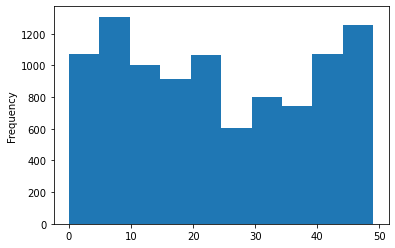

In [328]:
X_df['cluster'].plot(kind='hist');

In [329]:
kmeans = KMeans(n_clusters=50,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([13,  5, 27, ..., 13, 41, 48], dtype=int32)

In [330]:
clusters.shape

(9843,)

In [331]:
musicclustered = pd.DataFrame(X_prep,  columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

In [332]:
musicclustered['cluster_id'] = clusters

In [334]:
musicclustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
0,1.026783,0.314932,-1.193932,0.630667,0.738549,-0.424550,-1.229003,-0.594192,0.618417,-0.382922,0.491431,13
1,1.933218,0.972119,0.215672,0.709186,-1.354006,1.270515,-1.200801,-0.594192,0.015207,1.638251,0.240988,5
2,1.648338,0.250989,1.343356,0.393186,-1.354006,2.397696,-1.090281,-0.594189,0.305061,0.992346,-0.843011,27
3,0.586515,0.616882,-0.348169,0.817133,-1.354006,1.903883,-1.065509,-0.594192,1.503646,1.373357,1.288715,40
4,1.430794,0.773186,-1.193932,0.557236,-1.354006,1.753593,-1.243602,-0.594189,-0.000460,0.255725,1.107324,27
...,...,...,...,...,...,...,...,...,...,...,...,...
9838,-1.288509,0.048504,0.497593,0.208508,0.738549,-0.524386,-0.917151,0.666271,-0.491645,0.161380,0.911536,39
9839,-0.558182,0.147970,-0.912011,-0.091541,0.738549,-0.257083,0.988367,0.398562,-0.794816,0.121464,-0.549774,21
9840,0.156606,-0.310285,-0.912011,0.207821,0.738549,-0.526533,-0.293774,-0.591347,-0.567634,-0.350264,0.108321,13
9841,-0.174890,-0.598026,-0.066248,0.001416,-1.354006,-0.520092,1.393970,-0.376957,-0.016128,0.321041,-0.801139,41


In [335]:
musicclustered['tid'] = original['tid']
musicclustered['artist'] = original['artist']
musicclustered['title'] = original['title']
musicclustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
0,1.026783,0.314932,-1.193932,0.630667,0.738549,-0.424550,-1.229003,-0.594192,0.618417,-0.382922,0.491431,13,03tqyYWC9Um2ZqU0ZN849H,waka flocka flame,no hands (feat. roscoe dash & wale)
1,1.933218,0.972119,0.215672,0.709186,-1.354006,1.270515,-1.200801,-0.594192,0.015207,1.638251,0.240988,5,1wLhwzPAtze5JT8qqXlqaO,trick daddy,take it to da house
2,1.648338,0.250989,1.343356,0.393186,-1.354006,2.397696,-1.090281,-0.594189,0.305061,0.992346,-0.843011,27,1BKT2I9x4RGKaKqW4up34s,dmx,ruff ryders' anthem
3,0.586515,0.616882,-0.348169,0.817133,-1.354006,1.903883,-1.065509,-0.594192,1.503646,1.373357,1.288715,40,4ns1XFP3W5JPyzvnAjMdHD,ugk,int'l players anthem (i choose you) (feat. out...
4,1.430794,0.773186,-1.193932,0.557236,-1.354006,1.753593,-1.243602,-0.594189,-0.000460,0.255725,1.107324,27,1bTphHXspys3RvvRxfzzIc,lil jon & the east side boyz,what u gon' do
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,-1.288509,0.048504,0.497593,0.208508,0.738549,-0.524386,-0.917151,0.666271,-0.491645,0.161380,0.911536,39,7sxr5Pvovng4ECTiCqeSWm,wilco,love is everywhere (beware)
9839,-0.558182,0.147970,-0.912011,-0.091541,0.738549,-0.257083,0.988367,0.398562,-0.794816,0.121464,-0.549774,21,4WDazmiEd5PyY3taS11VfD,orville peck,dead of night
9840,0.156606,-0.310285,-0.912011,0.207821,0.738549,-0.526533,-0.293774,-0.591347,-0.567634,-0.350264,0.108321,13,7oC1Lo7hqhpxIU8d5iH6cc,michaela anne,desert dove
9841,-0.174890,-0.598026,-0.066248,0.001416,-1.354006,-0.520092,1.393970,-0.376957,-0.016128,0.321041,-0.801139,41,4bDALATwj7AYLJ9h8cImWf,joan shelley,coming down for you


In [210]:
musicclustered['cluster_id'].value_counts()

2     399
45    363
5     358
8     313
7     310
6     284
13    281
44    277
20    261
46    247
10    244
21    244
41    243
16    241
35    240
47    238
14    237
22    235
1     226
34    226
49    214
43    210
33    201
3     199
27    196
48    192
19    190
40    187
39    187
24    185
17    178
26    170
4     167
15    165
42    158
12    148
23    142
18    139
30    133
38    130
36    126
31    125
32    117
28     93
11     92
29     84
0      83
25     63
37     59
9      43
Name: cluster_id, dtype: int64

<AxesSubplot:xlabel='danceability', ylabel='tempo'>

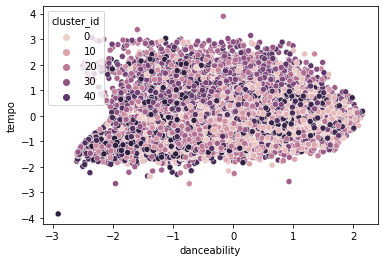

In [211]:
sns.scatterplot(data=musicclustered, x="danceability", y="tempo",hue='cluster_id')


<AxesSubplot:xlabel='cluster_id', ylabel='danceability'>

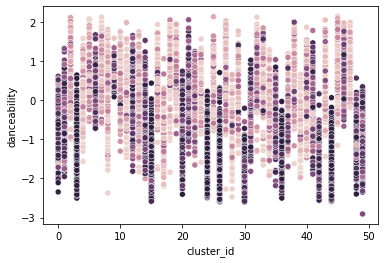

In [212]:
sns.scatterplot(data=musicclustered, x="cluster_id", y="danceability",hue='acousticness', legend=False)


# Clustering is done. Let's try to predict a cluster

In [213]:
# set clientID and client secret in global variables
#import getpass 
#clientid = '297ada524bde40a8a7e580b18966dbba'
#clientsecret = getpass.getpass() 

In [214]:
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=clientid, client_secret=clientsecret))

In [215]:
features = sp.audio_features('47EiUVwUp4C9fGccaPuUCS')[0]

In [216]:
# convert features into an np array
data = list(features.items())
features
predicter = pd.DataFrame(features, index=[0])
predicter = predicter.drop(['type','id','uri','track_href','analysis_url', 'duration_ms', 'time_signature'],axis =1)
predicter

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.731,0.573,4,-10.059,0,0.0544,0.401,0.000052,0.113,0.145,109.928


In [217]:
scaler = StandardScaler().fit(X.drop(['cluster'], axis = 1))


In [218]:
predicter_scaled = scaler.transform(predicter)
predicter_scaled

array([[ 0.87657406,  0.23677949, -0.34816924,  0.12283861, -1.3540064 ,
        -0.26030365, -0.15222159, -0.59404605, -0.38432087, -1.16671582,
        -0.2191448 ]])

In [219]:
kmeans.predict(predicter_scaled)

array([41], dtype=int32)

## Predicting a cluster works. Now let's build the function that gives a recommendation back

In [221]:
def recommend_song():
    input = "please enter a songname: "
    

In [271]:
a = sp.search(q= 'white washed')
a['tracks']['items'][0]['id']

'0jCUZSnjn6hxp7zgX3h2rF'

In [282]:
features=sp.audio_features(tracks='0jCUZSnjn6hxp7zgX3h2rF')
features

[{'danceability': 0.213,
  'energy': 0.964,
  'key': 10,
  'loudness': -5.248,
  'mode': 0,
  'speechiness': 0.0737,
  'acousticness': 7.05e-06,
  'instrumentalness': 0.114,
  'liveness': 0.453,
  'valence': 0.335,
  'tempo': 106.537,
  'type': 'audio_features',
  'id': '0jCUZSnjn6hxp7zgX3h2rF',
  'uri': 'spotify:track:0jCUZSnjn6hxp7zgX3h2rF',
  'track_href': 'https://api.spotify.com/v1/tracks/0jCUZSnjn6hxp7zgX3h2rF',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jCUZSnjn6hxp7zgX3h2rF',
  'duration_ms': 226253,
  'time_signature': 4}]

In [295]:
features[0]

{'danceability': 0.213,
 'energy': 0.964,
 'key': 10,
 'loudness': -5.248,
 'mode': 0,
 'speechiness': 0.0737,
 'acousticness': 7.05e-06,
 'instrumentalness': 0.114,
 'liveness': 0.453,
 'valence': 0.335,
 'tempo': 106.537,
 'type': 'audio_features',
 'id': '0jCUZSnjn6hxp7zgX3h2rF',
 'uri': 'spotify:track:0jCUZSnjn6hxp7zgX3h2rF',
 'track_href': 'https://api.spotify.com/v1/tracks/0jCUZSnjn6hxp7zgX3h2rF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jCUZSnjn6hxp7zgX3h2rF',
 'duration_ms': 226253,
 'time_signature': 4}

In [297]:
features_df_new = pd.DataFrame.from_dict(features[0], index=0) 


TypeError: from_dict() got an unexpected keyword argument 'index'

In [300]:
new = pd.DataFrame([features[0]])
final = new.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis = 1)


In [301]:
final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.964,10,-5.248,0,0.0737,0.000007,0.114,0.453,0.335,106.537


In [302]:
predictor = scaler.transform(final)

In [336]:
bro = kmeans.predict(final)

In [337]:
bro

array([31], dtype=int32)

In [338]:
bro[0]

31

In [352]:
temp = musicclustered[musicclustered["cluster_id"]==31]
temp

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
154,-0.713571,0.112447,-0.912011,-0.833827,0.738549,0.192716,0.680762,-0.576233,-0.663207,0.121464,1.856609,31,7L5FEYVfpIEGHJOv6gZ6EW,ali farka touré,bonde (with ry cooder)
171,-0.817163,-0.388437,-0.348169,-0.021961,0.738549,-0.446020,1.064588,1.427568,-0.047464,0.810913,1.793224,31,0nF3QZLQ8O1vQ4SjD3IdRS,"ali farka touré, toumani diabaté",doudou
177,-1.200456,-0.132666,1.343356,-0.881681,0.738549,-0.402006,0.887647,0.158740,-0.544132,1.591078,1.948063,31,2fqcpLdEA1wVrL3mGNQ32v,ali farka touré,goydiotodam
190,-0.273303,0.485445,-0.066248,0.211121,0.738549,-0.279627,0.174439,0.125276,-0.826935,0.912515,1.819777,31,3r8tadrcfrmhmzZBrn78iz,ali farka touré,penda yoro
193,-1.573389,-0.050962,1.625277,-0.814713,0.738549,-0.452461,0.748816,1.148705,-0.859054,1.420530,1.877628,31,3Ddx0d6CGil3D7AfvrwTV4,ali farka touré,kenouna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,0.198043,-0.498560,-0.912011,0.298990,0.738549,0.454651,0.933924,-0.594192,1.417473,0.618593,2.079510,31,07oxahRLcoeCHuXgJD8mgB,raffi,market day
9782,0.446665,-1.141538,-0.912011,-0.542165,0.738549,-0.163688,1.192530,-0.594192,-0.703943,1.496732,1.442730,31,63n8zk4mEqyrTywaYVAkgz,raffi,who built the ark?
9786,0.177325,-0.107800,0.497593,0.109913,0.738549,-0.475005,-0.108667,-0.594192,0.743759,1.224582,2.264756,31,28smxYbciKWO6pXc1DSnzp,raffi,this little light of mine
9792,0.291276,-1.475815,-0.066248,-0.939985,0.738549,1.066549,0.923035,-0.594192,-0.526114,1.696309,1.947865,31,6TRdg2K2wsSaywx1f5FZA3,raffi,the sharing song


In [353]:
temp = temp.reset_index()
temp

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
0,154,-0.713571,0.112447,-0.912011,-0.833827,0.738549,0.192716,0.680762,-0.576233,-0.663207,0.121464,1.856609,31,7L5FEYVfpIEGHJOv6gZ6EW,ali farka touré,bonde (with ry cooder)
1,171,-0.817163,-0.388437,-0.348169,-0.021961,0.738549,-0.446020,1.064588,1.427568,-0.047464,0.810913,1.793224,31,0nF3QZLQ8O1vQ4SjD3IdRS,"ali farka touré, toumani diabaté",doudou
2,177,-1.200456,-0.132666,1.343356,-0.881681,0.738549,-0.402006,0.887647,0.158740,-0.544132,1.591078,1.948063,31,2fqcpLdEA1wVrL3mGNQ32v,ali farka touré,goydiotodam
3,190,-0.273303,0.485445,-0.066248,0.211121,0.738549,-0.279627,0.174439,0.125276,-0.826935,0.912515,1.819777,31,3r8tadrcfrmhmzZBrn78iz,ali farka touré,penda yoro
4,193,-1.573389,-0.050962,1.625277,-0.814713,0.738549,-0.452461,0.748816,1.148705,-0.859054,1.420530,1.877628,31,3Ddx0d6CGil3D7AfvrwTV4,ali farka touré,kenouna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,9765,0.198043,-0.498560,-0.912011,0.298990,0.738549,0.454651,0.933924,-0.594192,1.417473,0.618593,2.079510,31,07oxahRLcoeCHuXgJD8mgB,raffi,market day
121,9782,0.446665,-1.141538,-0.912011,-0.542165,0.738549,-0.163688,1.192530,-0.594192,-0.703943,1.496732,1.442730,31,63n8zk4mEqyrTywaYVAkgz,raffi,who built the ark?
122,9786,0.177325,-0.107800,0.497593,0.109913,0.738549,-0.475005,-0.108667,-0.594192,0.743759,1.224582,2.264756,31,28smxYbciKWO6pXc1DSnzp,raffi,this little light of mine
123,9792,0.291276,-1.475815,-0.066248,-0.939985,0.738549,1.066549,0.923035,-0.594192,-0.526114,1.696309,1.947865,31,6TRdg2K2wsSaywx1f5FZA3,raffi,the sharing song


In [354]:
random = randint(0, len(temp))

In [355]:
random

24

In [356]:
title = temp.iloc[random].values[15]
artist = temp.iloc[r].values[16];
print(title)
print(artist)

NameError: name 'r' is not defined

In [359]:
def spotify_recomendation():
    user = input"Please enter a song title: "
    a = sp.search(q=user)
    print(a['tracks']['items'][0]['id'])


SyntaxError: invalid syntax (<ipython-input-359-25c388c02162>, line 2)